# Wavelength Loss dependence using BraggExact

Here for the N2 configuration from Bird.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from scipy.optimize import newton

# Initialize

In [85]:
n = 300
wls = np.linspace(.4e-6, 1.6e-6, n+1)
betas1 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [86]:
# n_air = 1.00027717
# n_glass = 1.4388164768221814
# ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass]
# ts = [15*1e-6, .42*1e-6, 15*1e-6, 15*1e-6]

In [87]:
ts = [15*1e-6, .42*1e-6, 15*1e-6, 10*1e-6, 5e-6]
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass, lambda x:n_air]
mats = ['air', 'glass', 'air', 'glass','air']

# Four Layer Study: Glass outside Air (Outside Cladding)

In [94]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=[100 ,100, 100, 100, 100], wl=wl,no_mesh=True)

    k_low = A.ks[0] * A.scale
    if wl <.8e-6:
        guess = np.array(.99995 * k_low)
    else:
        guess = np.array(.9999 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas1[i] = beta
    

     --------------------  1/301: wavelength: 4e-07  --------------------     

scaling guess: 1
Scaled beta:  (235.6722360896447-1.2465556103720069e-08j) . Residual of determinant:  3.137848491744319e-08 


     --------------------  2/301: wavelength: 4.0399999999999996e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (233.3385512131841-2.700660883643145e-08j) . Residual of determinant:  2.432585043096702e-08 


     --------------------  3/301: wavelength: 4.08e-07  --------------------     

Scaled beta:  (231.05061018399857-2.2150917994904694e-08j) . Residual of determinant:  1.0826435755799123e-08 


     --------------------  4/301: wavelength: 4.12e-07  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (228.8070680140771-5.365013805102533e-08j) . Residual of determinant:  1.3725473982924315e-08 


     --------------------  5/301: wavelength: 4.1599999999999997e-07  --------------------     

Scaled beta: 

Scaled beta:  (170.76920005867657-9.674600988814881e-09j) . Residual of determinant:  1.0481425263988715e-07 


     --------------------  40/301: wavelength: 5.56e-07  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (169.5403902538799-2.5340632404152536e-08j) . Residual of determinant:  1.3970342621787731e-08 


     --------------------  41/301: wavelength: 5.599999999999999e-07  --------------------     

Scaled beta:  (168.3291362778701-3.827589797613461e-07j) . Residual of determinant:  2.8442580718605494e-09 


     --------------------  42/301: wavelength: 5.64e-07  --------------------     

Scaled beta:  (167.13505643789674-1.499405184982222e-08j) . Residual of determinant:  1.1524225274676476e-08 


     --------------------  43/301: wavelength: 5.679999999999999e-07  --------------------     

Scaled beta:  (165.957794406198-1.1265619968933521e-08j) . Residual of determinant:  1.9780606520615196e-08 


     --------------------  44/301: wavelength:

Scaled beta:  (132.38475235023316-1.9557123941309594e-06j) . Residual of determinant:  5.078022482320153e-10 


     --------------------  80/301: wavelength: 7.16e-07  --------------------     

scaling guess: 1
Scaled beta:  (131.64491401905352-1.057551203041079e-06j) . Residual of determinant:  1.562821210578348e-10 


     --------------------  81/301: wavelength: 7.199999999999999e-07  --------------------     

Scaled beta:  (130.9132661420251-1.9690146697819298e-07j) . Residual of determinant:  3.7346551173719485e-09 


     --------------------  82/301: wavelength: 7.24e-07  --------------------     

scaling guess: 1
Scaled beta:  (130.18970322377942-1.2005525224164173e-07j) . Residual of determinant:  1.4292172624967208e-09 


     --------------------  83/301: wavelength: 7.28e-07  --------------------     

Scaled beta:  (129.47408818437194-1.2842131218824913e-07j) . Residual of determinant:  1.2586595066923665e-09 


     --------------------  84/301: wavelength: 7.3199999

Scaled beta:  (110.61797119174213-1.7371742673054457e-05j) . Residual of determinant:  4.495922050583071e-12 


     --------------------  115/301: wavelength: 8.559999999999999e-07  --------------------     

Scaled beta:  (110.12530527902088-1.2859720737500706e-05j) . Residual of determinant:  4.889242860949353e-11 


     --------------------  116/301: wavelength: 8.599999999999999e-07  --------------------     

Scaled beta:  (109.60425352117457-0.00022038151970501003j) . Residual of determinant:  8.687324908179425e-14 


     --------------------  117/301: wavelength: 8.639999999999999e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (109.09195190885048-0.0002562866717546141j) . Residual of determinant:  1.0579006693451271e-12 


     --------------------  118/301: wavelength: 8.68e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (108.5

Scaled beta:  (94.24553067346251-1.3069459505180195e-06j) . Residual of determinant:  9.035502387880843e-10 


     --------------------  152/301: wavelength: 1.004e-06  --------------------     

scaling guess: 1
Scaled beta:  (93.86976099659879-9.56601209053071e-07j) . Residual of determinant:  5.531855879338627e-10 


     --------------------  153/301: wavelength: 1.008e-06  --------------------     

Scaled beta:  (93.49697634794417-8.207777065468135e-07j) . Residual of determinant:  7.164562192201248e-11 


     --------------------  154/301: wavelength: 1.0119999999999998e-06  --------------------     

Scaled beta:  (93.1271402078289-8.063560151363542e-07j) . Residual of determinant:  6.421027990077522e-10 


     --------------------  155/301: wavelength: 1.0159999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (92.76021694728044-9.041802212537031e-07j) . Residual of determinant:  6.414260348798281e-10 


     --------------------  156/301: wavelength:

Scaled beta:  (81.80115750425432-8.872193299036825e-05j) . Residual of determinant:  4.912958632525141e-12 


     --------------------  190/301: wavelength: 1.156e-06  --------------------     

Scaled beta:  (81.51778435825713-9.349328457761411e-06j) . Residual of determinant:  2.0500831697538248e-11 


     --------------------  191/301: wavelength: 1.16e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (81.23641699379952-3.3417891224519895e-06j) . Residual of determinant:  1.1530982097530717e-10 


     --------------------  192/301: wavelength: 1.1639999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (80.95699346393408-1.7942578054511722e-06j) . Residual of determinant:  4.845768099054476e-11 


     --------------------  193/301: wavelength: 1.1679999999999999e-06  --------------------     

Scaled beta:  (80.67948658587487-1.1879071945046478e-06j) . Residual of determinant:  4.49414243119325

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (72.2570143580841-6.838759237928349e-06j) . Residual of determinant:  2.302455491039472e-11 


     --------------------  228/301: wavelength: 1.3079999999999998e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (72.03578367662483-3.5491276774554707e-06j) . Residual of determinant:  5.4942722441212136e-11 


     --------------------  229/301: wavelength: 1.3119999999999999e-06  --------------------     

Scaled beta:  (71.81590615422303-2.2557570029099545e-06j) . Residual of determinant:  1.681939516280914e-10 


     --------------------  230/301: wavelength: 1.3159999999999998e-06  --------------------     

Scaled beta:  (71.59736671364692-1.6260667981184222e-06j) . Residual of determinant:  9.251200058377949e-11 


     --------------------  231/301: wavelength: 1.3199999999999999e-06  --------------------     

Scaled beta:  (71.38015213526602-1.2808823979446803e-06j) . Residual of dete

Scaled beta:  (64.88314769331734-2.0500723689019666e-06j) . Residual of determinant:  1.6759195416868946e-11 


     --------------------  265/301: wavelength: 1.456e-06  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (64.70464282007484-2.621131663977786e-06j) . Residual of determinant:  7.482451577105848e-11 


     --------------------  266/301: wavelength: 1.4599999999999998e-06  --------------------     

Scaled beta:  (64.52711400434963-3.569721828327082e-06j) . Residual of determinant:  1.0903047565567008e-10 


     --------------------  267/301: wavelength: 1.4639999999999999e-06  --------------------     

Scaled beta:  (64.35055232803525-5.286935901765105e-06j) . Residual of determinant:  7.588961793082965e-11 


     --------------------  268/301: wavelength: 1.4679999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (64.17494795723286-8.835452223472456e-06j) . Residual of determinant:  1.86

Scaled beta:  (59.18792855370581-0.023176207063276673j) . Residual of determinant:  1.343222747262207e-12 


     --------------------  300/301: wavelength: 1.5959999999999998e-06  --------------------     

Scaled beta:  (59.020516279910105-0.00031475896733818606j) . Residual of determinant:  8.664509390749966e-13 


     --------------------  301/301: wavelength: 1.6e-06  --------------------     

Scaled beta:  (58.872754245675054-8.675485577520691e-05j) . Residual of determinant:  2.7247005460311363e-12 




In [102]:
# Formula for loss spikes from article

ms1 = np.arange(1,3,1)
ms2 = np.arange(13,60,1)

n1 = A.ns[0]  # Inner (core) index
n2 = A.ns[1]  # Cladding index

d1 = ts[1]
d2 = ts[3]

ls1 = (2 * n1 * d1 / ms1 * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver
ls2 = (2 * n1 * d2 / ms2 * ((n2/n1)**2 - 1)**.5)  # when n2 depends on ls, need solver


<IPython.core.display.Javascript object>


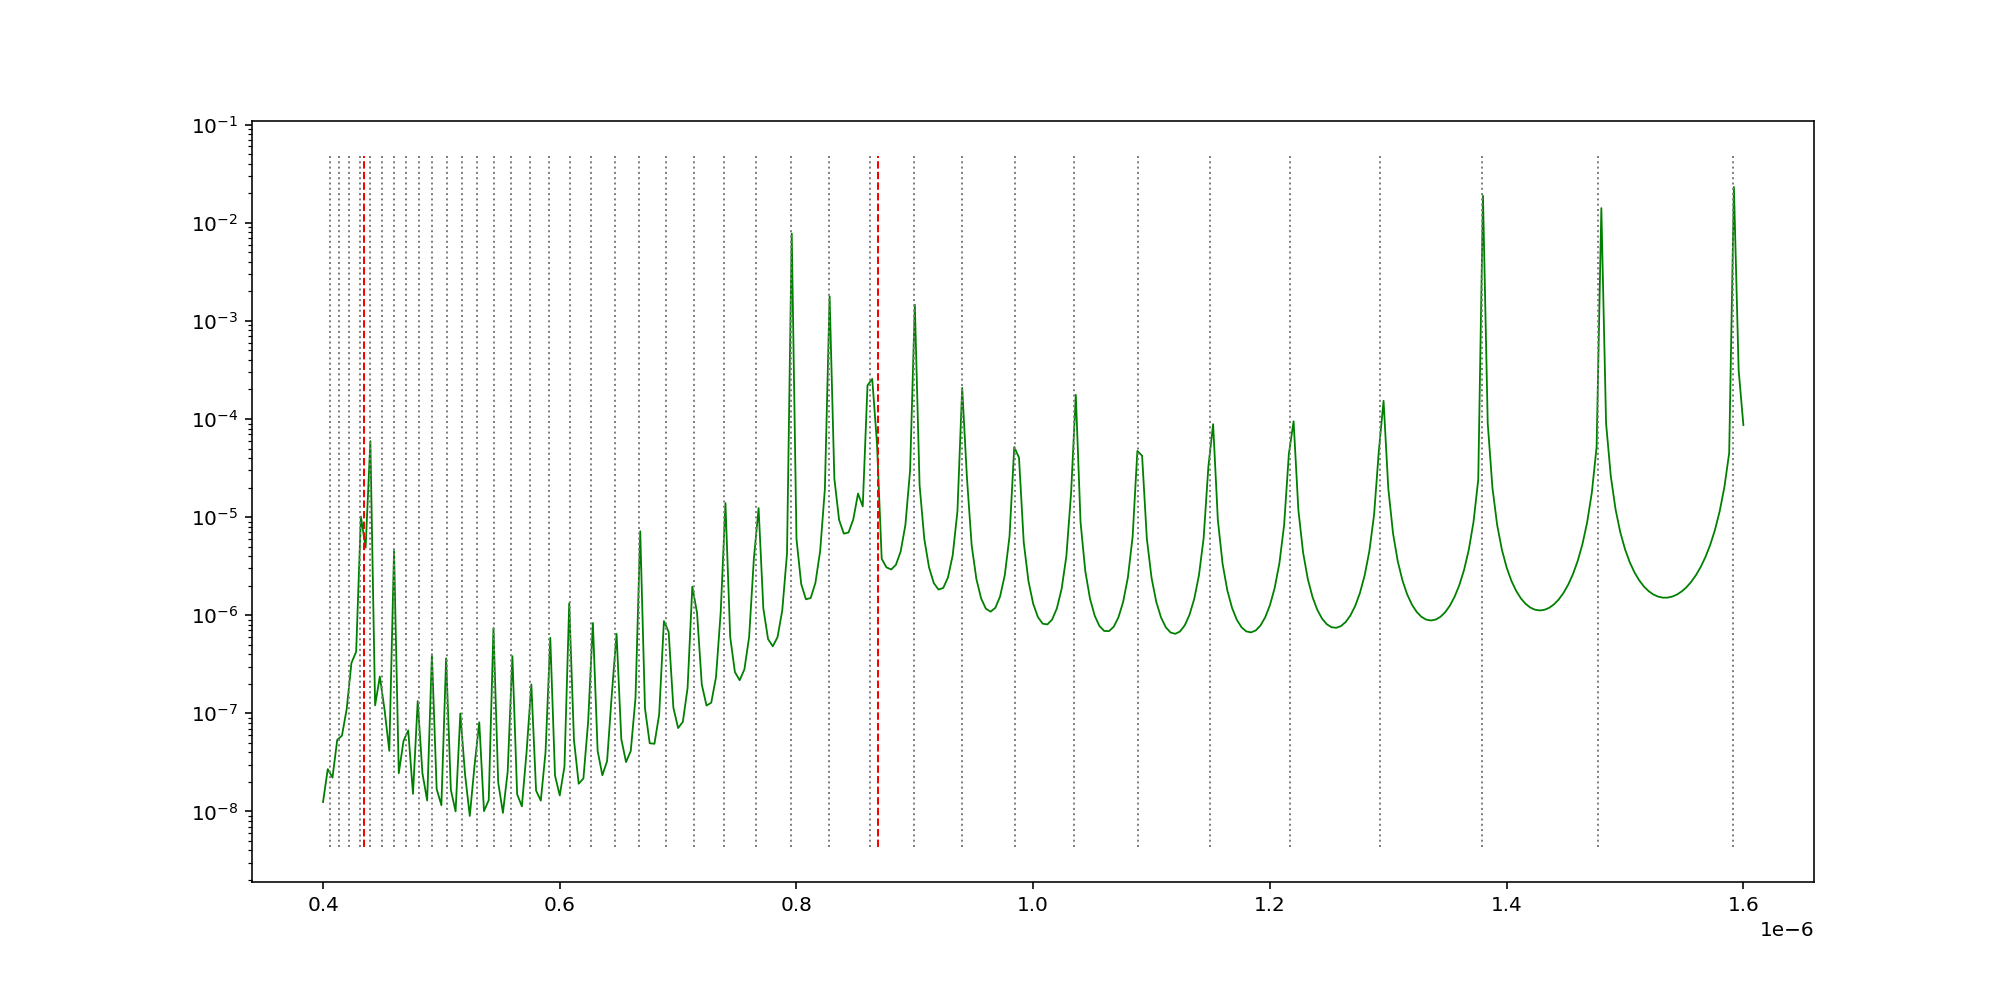

In [105]:
%matplotlib notebook
plt.figure(figsize=(14,7))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
m, M = plt.ylim()
for l in ls1:
    plt.plot([l,l], [m, M], color='red', linewidth=1, linestyle='--')
    
for l in ls2:
    if l >= wls[0] and l <= wls[-1]:
        plt.plot([l,l], [m, M], color='grey',  linewidth=1, linestyle=':')

# Base

In [75]:
n = 300
wls = np.linspace(.4e-6, 1.6e-6, n+1)
betas2 = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

In [76]:
n_air = 1.00027717
n_glass = 1.4388164768221814
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x : n_glass]
ts = [15*1e-6, .42*1e-6, 15*1e-6, 15*1e-6]
mats = ['air', 'glass', 'air', 'glass']

# Four Layer Study: Glass outside Air (Outside Cladding)

In [79]:
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=[100 ,100, 100, 100], wl=wl,no_mesh=True)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99995 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

     --------------------  1/301: wavelength: 4e-07  --------------------     

Scaled beta:  (235.6722357617486-3.961628752413218e-07j) . Residual of determinant:  1.2334784814980673e-11 


     --------------------  2/301: wavelength: 4.0399999999999996e-07  --------------------     

Scaled beta:  (233.33855190308049-5.296363954428654e-07j) . Residual of determinant:  4.392163586720625e-12 


     --------------------  3/301: wavelength: 4.08e-07  --------------------     

Scaled beta:  (231.05060962656134-7.362811945582826e-07j) . Residual of determinant:  1.458866662244573e-11 


     --------------------  4/301: wavelength: 4.12e-07  --------------------     

Scaled beta:  (228.80706936342466-1.0766549134422537e-06j) . Residual of determinant:  6.986771685937444e-12 


     --------------------  5/301: wavelength: 4.1599999999999997e-07  --------------------     

Scaled beta:  (226.6066372667533-1.6863882226878692e-06j) . Residual of determinant:  2.7883375436330103e-12 


   

Scaled beta:  (170.76920007785685-3.7915512683483e-07j) . Residual of determinant:  9.58061821931193e-12 


     --------------------  40/301: wavelength: 5.56e-07  --------------------     

Scaled beta:  (169.54039073525033-3.848493169439777e-07j) . Residual of determinant:  3.329184050634555e-11 


     --------------------  41/301: wavelength: 5.599999999999999e-07  --------------------     

scaling guess: 1
Scaled beta:  (168.32913392924672-3.916282402596418e-07j) . Residual of determinant:  1.7177078555734166e-11 


     --------------------  42/301: wavelength: 5.64e-07  --------------------     

Scaled beta:  (167.13505617235901-3.994910952421512e-07j) . Residual of determinant:  4.392483364643062e-11 


     --------------------  43/301: wavelength: 5.679999999999999e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
Scaled beta:  (165.95779449918908-4.084472764114975e-07j) . Residual of determinant:  3.435901097420596e-11 




scaling guess: 1
Scaled beta:  (133.88969536417025-2.2349993335964906e-06j) . Residual of determinant:  4.061483778400036e-12 


     --------------------  78/301: wavelength: 7.079999999999999e-07  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (133.13298016074017-2.406928068860644e-06j) . Residual of determinant:  7.866968676391203e-12 


     --------------------  79/301: wavelength: 7.119999999999999e-07  --------------------     

Scaled beta:  (132.3847642610515-2.5961201722762216e-06j) . Residual of determinant:  3.866626426266412e-12 


     --------------------  80/301: wavelength: 7.16e-07  --------------------     

Scaled beta:  (131.64490508986543-2.8046849965253085e-06j) . Residual of determinant:  1.0542651334699597e-11 


     --------------------  81/301: wavelength: 7.199999999999999e-07  --------------------     

scaling guess: 1
Scaled beta:  (130.91326322768813-3.0350436465342845e-06j) . Residual of determinant:  1.6621100482960248e-13 

scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
scaling guess: 6
scaling guess: 7
scaling guess: 8
scaling guess: 9
scaling guess: 10
scaling guess: 11
scaling guess: 12
scaling guess: 13
scaling guess: 14
scaling guess: 15
scaling guess: 16
scaling guess: 17
scaling guess: 18
scaling guess: 19
scaling guess: 20
scaling guess: 21
scaling guess: 22
scaling guess: 23
Captured wrong mode, retrying.
scaling guess: 24
scaling guess: 25
scaling guess: 26
scaling guess: 27
scaling guess: 28
scaling guess: 29
scaling guess: 30
scaling guess: 31
scaling guess: 32
scaling guess: 33
scaling guess: 34
scaling guess: 35
scaling guess: 36
Captured wrong mode, retrying.
scaling guess: 37
scaling guess: 38
scaling guess: 39
scaling guess: 40
scaling guess: 41
scaling guess: 42
scaling guess: 43
scaling guess: 44
scaling guess: 45
scaling guess: 46
scaling guess: 47
scaling guess: 48
scaling guess: 49
scaling guess: 50
scaling guess: 51
Captured wrong mode, retrying

scaling guess: 1
Scaled beta:  (97.36349649292087-2.456935356658977e-05j) . Residual of determinant:  1.8255835624043532e-12 


     --------------------  144/301: wavelength: 9.719999999999998e-07  --------------------     

Scaled beta:  (96.96251077307227-2.364137229506169e-05j) . Residual of determinant:  1.8840346921712995e-13 


     --------------------  145/301: wavelength: 9.759999999999998e-07  --------------------     

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (96.56481581570591-2.2791659540995236e-05j) . Residual of determinant:  4.901518817031151e-13 


     --------------------  146/301: wavelength: 9.8e-07  --------------------     

Scaled beta:  (96.17037081268543-2.2012062517379957e-05j) . Residual of determinant:  1.0911933170683267e-12 


     --------------------  147/301: wavelength: 9.839999999999998e-07  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (95.77913568582824-2.1295450033487173e-05j) . Residual of det

scaling guess: 2
Scaled beta:  (84.44210562560242-1.2828640358553694e-05j) . Residual of determinant:  1.313861541884394e-12 


     --------------------  181/301: wavelength: 1.1199999999999999e-06  --------------------     

Scaled beta:  (84.14027212766466-1.2771444538005136e-05j) . Residual of determinant:  1.2258428046088359e-12 


     --------------------  182/301: wavelength: 1.1239999999999997e-06  --------------------     

Scaled beta:  (83.84058631754651-1.2719531160769209e-05j) . Residual of determinant:  2.235056412439921e-13 


     --------------------  183/301: wavelength: 1.1279999999999998e-06  --------------------     

Scaled beta:  (83.54302533221077-1.2672674054407093e-05j) . Residual of determinant:  2.1953455118455993e-12 


     --------------------  184/301: wavelength: 1.132e-06  --------------------     

scaling guess: 1
Scaled beta:  (83.24756663266092-1.2630662453357072e-05j) . Residual of determinant:  4.836425928459559e-14 


     -------------------- 

Scaled beta:  (74.31071844991108-1.319799550678691e-05j) . Residual of determinant:  3.1273144494073396e-14 


     --------------------  219/301: wavelength: 1.2719999999999998e-06  --------------------     

Scaled beta:  (74.07678734227677-1.3258357000656936e-05j) . Residual of determinant:  6.166607638592889e-13 


     --------------------  220/301: wavelength: 1.2759999999999997e-06  --------------------     

Scaled beta:  (73.84432213240363-1.3320744169970522e-05j) . Residual of determinant:  6.395257394411267e-13 


     --------------------  221/301: wavelength: 1.2799999999999998e-06  --------------------     

Scaled beta:  (73.61330907502911-1.3385137878289282e-05j) . Residual of determinant:  3.8761313718566126e-13 


     --------------------  222/301: wavelength: 1.284e-06  --------------------     

scaling guess: 1
scaling guess: 2
Scaled beta:  (73.38373459624711-1.3451520346747153e-05j) . Residual of determinant:  8.174015039351192e-13 


     --------------------  

scaling guess: 1
scaling guess: 2
scaling guess: 3
Scaled beta:  (66.3473434423425-1.683038311587803e-05j) . Residual of determinant:  7.791386086791308e-13 


     --------------------  257/301: wavelength: 1.4239999999999998e-06  --------------------     

scaling guess: 1
Scaled beta:  (66.1607246747224-1.6962376354591407e-05j) . Residual of determinant:  9.368420335514178e-14 


     --------------------  258/301: wavelength: 1.428e-06  --------------------     

Scaled beta:  (65.97515066130174-1.709627301752736e-05j) . Residual of determinant:  1.656066885970322e-13 


     --------------------  259/301: wavelength: 1.4319999999999998e-06  --------------------     

Scaled beta:  (65.79061264620611-1.723208036708609e-05j) . Residual of determinant:  7.782279283223144e-13 


     --------------------  260/301: wavelength: 1.4359999999999999e-06  --------------------     

scaling guess: 1
Scaled beta:  (65.60710197113288-1.736980600460322e-05j) . Residual of determinant:  7.804301

Scaled beta:  (59.92300689862474-2.326729811037481e-05j) . Residual of determinant:  2.8298615098601842e-14 


     --------------------  295/301: wavelength: 1.5759999999999998e-06  --------------------     

Scaled beta:  (59.770666683286144-2.3479136855335902e-05j) . Residual of determinant:  1.3428700976330426e-12 


     --------------------  296/301: wavelength: 1.58e-06  --------------------     

scaling guess: 1
Scaled beta:  (59.619097124851834-2.369334571022191e-05j) . Residual of determinant:  3.541894764230656e-13 


     --------------------  297/301: wavelength: 1.5839999999999998e-06  --------------------     

Scaled beta:  (59.4682923844057-2.3909941323390357e-05j) . Residual of determinant:  1.8979942634941615e-13 


     --------------------  298/301: wavelength: 1.5879999999999999e-06  --------------------     

Scaled beta:  (59.31824668186524-2.4128940536049312e-05j) . Residual of determinant:  1.4474344202632205e-12 


     --------------------  299/301: wavelen

<IPython.core.display.Javascript object>


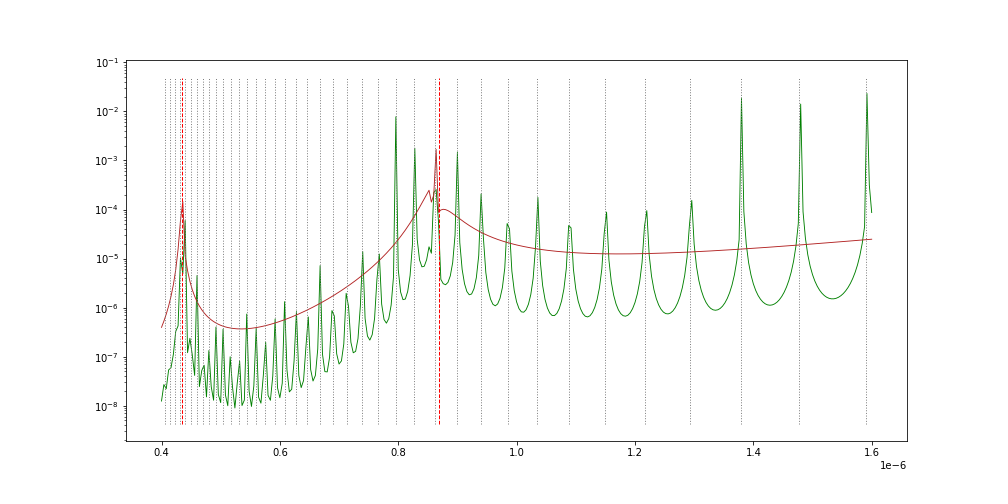

In [107]:
%matplotlib notebook
plt.figure(figsize=(14,7))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.plot(wls, -betas2.imag, color='firebrick', linewidth=.9)

plt.yscale('log')
m, M = plt.ylim()
for l in ls1:
    plt.plot([l,l], [m, M], color='red', linewidth=1, linestyle='--')
    
    
for l in ls2:
    if l >= wls[0] and l <= wls[-1]:
        plt.plot([l,l], [m, M], color='grey',  linewidth=1, linestyle=':')

## Bad wavelengths

In [ ]:
ls
np.where(abs(wls-1.88e-6)<(wls[1]-wls[0]))

In [ ]:
wls[240]

In [ ]:
A = BraggExact(ts=ts, ns=ns, maxhs=[.1 ,.02, .04, .02], wl=wls[240])


In [ ]:
k_low = A.ks[0] * A.scale


In [ ]:
plotlogf(A.determinant, .9998*k_low, k_low, -.0015,.0015, nu, outer,
         iref=100, rref=100, levels=100, figsize=(8,6))

In [ ]:
guess = np.array(50.1448)
imag = 0
x0 = np.array(guess + imag*1j)

beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
beta

In [ ]:
betas1[240] = beta

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9)
plt.yscale('log')
for l in ls:
    plt.plot([l,l], [0, .0001],  linewidth=1, linestyle=':')

# Using Sellmeier

In [ ]:
betas2=np.zeros_like(betas1)
for i, wl in enumerate(wls):
    print(5 * ' ' +  + 20 * '-' + '  ' + str(i+1) + '/' + str(n+1) + ': ' +
          'wavelength: ' +  str(wls[i]) + '  ' +  20 * '-' +5 * ' '+'\n')
          
    A = BraggExact(ts=ts, maxhs=[1 ,1, 1, 1], wl=wl)

    k_low = A.ks[0] * A.scale
    guess = np.array(.99995 * k_low)
    imag = 0
    flag = True
    reduce = 0

    while flag:
        try:
            x0 = np.array(guess + imag*1j)
            beta = newton(A.determinant, x0, args=(nu, outer), tol = 1e-17)
            if beta.real > k_low:
                print("Captured wrong mode, retrying.")
                raise RuntimeError
            elif beta.imag > 0:
                print("Positive imaginary part, retrying.")
                imag = -beta.imag
                guess *= 1/.999999
                raise RuntimeError
            else:
                print("Scaled beta: ", beta, ". Residual of determinant: ", 
                      abs(A.determinant(beta, nu, outer)), '\n\n' )
                imag = beta.imag
                flag=False
        except RuntimeError:
            guess *= .999999
            reduce += 1
            print("scaling guess: " + str(reduce), flush=True)
    betas2[i] = beta
    

In [ ]:
ls_sell=np.load('ls_sell.npy')

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,5))
plt.plot(wls, -betas1.imag, color='green', linewidth=.9, label='no sellmeier')
plt.plot(wls, -betas2.imag, color='red', linewidth=.9, label='sellmeier')
plt.yscale('log')
plt.legend()
for l in ls_sell:
    plt.plot([l,l], [0, .0001],  linewidth=1, color='r',linestyle=':')
for l in ls:
    plt.plot([l,l], [0, .0001],  linewidth=1, color='g',linestyle=':')
